In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import tqdm
import random
import re

In [3]:
def umap_distance(rv_1, rv_2, df_umap):
    x1 = df_umap[df_umap.Rv_ID == rv_1].u1.values[0]
    y1 = df_umap[df_umap.Rv_ID == rv_1].u2.values[0]
    x2 = df_umap[df_umap.Rv_ID == rv_2].u1.values[0]
    y2 = df_umap[df_umap.Rv_ID == rv_2].u2.values[0]
    return np.sqrt( (x1 - x2)**2 + (y1 - y2)**2 )

In [9]:
df = pd.read_csv('../../data/tests/df_umap.csv')
df.head(2)

,Rv_ID,gene_name,func_tuberculist,COG,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,...,zhang_Tyloxapol_pH_6.5_vs_zhang_pcit_pH_4.5,zhang_mhcii_mouse_d10_vs_zhang_wt_mouse_d10,zhang_mhcii_mouse_d45_vs_zhang_wt_mouse_d45,zhang_wt_mouse_d10_vs_zhang_input_library,zhang_wt_mouse_d45_vs_zhang_input_library,sum_CES,u1,u2,u3,cluster_labels
0,Rv0003,recF,information pathways,L,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,-16.680069,-2.016419,10.354388,8
1,Rv0007,-,cell wall and cell processes,S,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,9.0,-11.018177,-2.696438,12.063074,5


In [10]:
rv_1 = 'Rv0003'
rv_2 = 'Rv0007'
umap_distance(rv_1, rv_2, df)

5.702582484807108

In [69]:
list_rv_id = df.Rv_ID.to_list()
list_rv_id = [rv for rv in list_rv_id if 'Rvnr' not in rv]
list_int_rv_id = [int(re.split( 'c|A|B|D' , rv.split('Rv')[1] )[0]) for rv in list_rv_id]

In [70]:
window_size = 5
list_pairs = [(ind_list[i], ind_list[j]) for i in range(len(ind_list)) for j in range(i+1,len(ind_list)) 
 if np.abs(list_int_rv_id[i] - list_int_rv_id[j]) <= window_size]

In [73]:
len(list_pairs)

3629

In [75]:
list_dist = []
for rv_pair in tqdm.tqdm(list_pairs):
    list_dist.append(umap_distance( list_rv_id[rv_pair[0]], list_rv_id[rv_pair[1]], df))

100%|██████████| 3629/3629 [00:14<00:00, 254.72it/s]


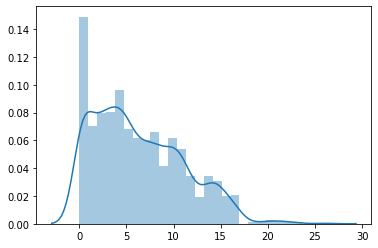

In [76]:
sns.distplot(list_dist)

In [77]:
num_iter = 4000
list_dist_rand = []
for i in range(num_iter):
    rvid_pair = random.sample(list_rv_id, 2)
    list_dist_rand.append(umap_distance( rvid_pair[0], rvid_pair[1], df))

Text(0, 0.5, 'fraction of gene pairs')

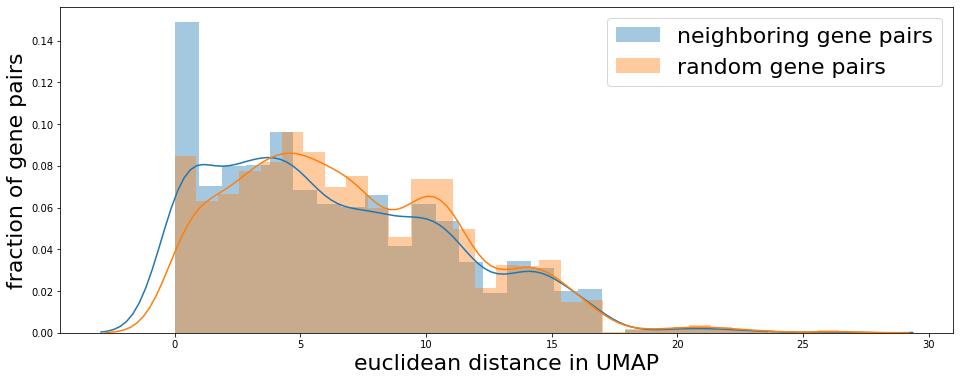

In [80]:
plt.figure(figsize = (16,6))
sns.distplot(list_dist)
sns.distplot(list_dist_rand)
plt.legend(['neighboring gene pairs', 'random gene pairs'], fontsize = 22)
plt.xlabel('euclidean distance in UMAP', fontsize = 22)
plt.ylabel('fraction of gene pairs', fontsize = 22)
plt.savefig('../../figures/pairwise_distances/umap_vs_genome.', dpi=300)